In [52]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import random
from colossus.cosmology import cosmology
cosmology.setCosmology('planck18')
from colossus.halo import concentration, mass_defs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from pylab import rcParams
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
rcParams['font.family'] = 'serif'
rc('text.latex',preamble=r'\usepackage{/Volumes/Extreme_SSD/codes/master_thesis/code/configs/apjfonts}')
from matplotlib.lines import Line2D
sz_ft = 22
sz_lb = 14
color_arr = ['indigo', 'royalblue', 'lightseagreen', 'darkgreen', 'goldenrod', 'darkred']
from tqdm import tqdm
import cosmo
import lensing_estimator
from cosmo import CosmoCalc
import lensing
import foregrounds as fg
import experiments as exp
import sims
import stats
import tools
import ilc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## General Settings

In [32]:
nber_clus = 3000
nber_rand = 50000
nber_cov = 500
nber_runs = 25
map_params = [240, 0.25, 240, 0.25] 
l, cl = CosmoCalc().cmb_power_spectrum()
c500 = concentration.concentration(2e14, '500c', 0.7)
M200c, _, _ = mass_defs.changeMassDefinition(2e14, c500, 0.7, '500c', '200c', profile='nfw')
z = 0.7
cluster = [2e14, cosmo.concentration_parameter(2e14, z, 0.674), z]
opbeam = 1.4
l, bl = exp.beam_power_spectrum(beam_fwhm = opbeam)
mass_int = np.arange(0, 4, 0.1)


l, cl_residual_so, res_ilc_dic_so, weights_arr_so = ilc.residuals_and_weights(components = 'all', experiment = 'so_lat', cov_from_sims = True)
cl_noise_so =  cl_residual_so

l, cl_residual_fyst, res_ilc_dic_fyst, weights_arr_fyst = ilc.residuals_and_weights(components = 'all', experiment = 'so_lat_fyst', cov_from_sims = True)
cl_noise_fyst =  cl_residual_fyst

l, cl_residual_s4wide, res_ilc_dic_s4wide, weights_arr_s4wide = ilc.residuals_and_weights(components = 'all', experiment = 's4wide', cov_from_sims = True)
cl_noise_s4wide =  cl_residual_s4wide

cl_residuals = [cl_residual_so, cl_residual_fyst, cl_residual_s4wide]

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))


## SNR for SO LAT, SO LAT + FYST, S4-Wide

In [8]:
maps_rand_so = sims.cmb_forecast_data(experiment = 'so_lat', map_params = map_params, l = l, cl = cl, cl_residual = cl_residual_so, opbeam = opbeam, nber_obs = nber_rand)
stack_bg_so = lensing_estimator.stack(map_params, maps_rand_so, l = l, cl = cl, cl_noise = cl_noise_so)                                       
del maps_rand_so
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_so.npy', stack_bg_so)  

maps_rand_fyst = sims.cmb_forecast_data(experiment = 'so_lat_fyst', map_params = map_params, l = l, cl = cl, cl_residual = cl_residual_fyst, opbeam = opbeam, nber_obs = nber_rand)
stack_bg_fyst = lensing_estimator.stack(map_params, maps_rand_fyst, l = l, cl = cl, cl_noise = cl_noise_fyst)                                       
del maps_rand_fyst
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_fyst.npy', stack_bg_fyst) 


maps_rand_s4wide = sims.cmb_forecast_data(experiment = 's4wide', map_params = map_params, l = l, cl = cl, cl_residual = cl_residual_s4wide, opbeam = opbeam, nber_obs = nber_rand)
stack_bg_s4wide = lensing_estimator.stack(map_params, maps_rand_s4wide, l = l, cl = cl, cl_noise = cl_noise_s4wide)                                       
del maps_rand_s4wide
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_s4wide.npy', stack_bg_s4wide)   

In [15]:
covariance_matrix_so, _ = lensing_estimator.covariance_and_correlation_matrix(nber_cov, nber_clus, map_params, l, cl, bl = bl_arr_so, opbeam = opbeam, experiment = 'so_lat', components = 'all', cl_noise = cl_noise_so)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_so.npy', covariance_matrix_so)

covariance_matrix_fyst, _ = lensing_estimator.covariance_and_correlation_matrix(nber_cov, nber_clus, map_params, l, cl, bl = bl_arr_fyst, opbeam = opbeam, experiment = 'so_lat_fyst', components = 'all', cl_noise = cl_noise_fyst)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_fyst.npy', covariance_matrix_fyst)

covariance_matrix_s4wide, _ = lensing_estimator.covariance_and_correlation_matrix(nber_cov, nber_clus, map_params, l, cl, bl = bl_arr_s4wide, opbeam = opbeam, experiment = 's4wide', components = 'all', cl_noise = cl_noise_s4wide)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_s4wide.npy', covariance_matrix_s4wide)

100%|██████████| 100/100 [1:27:30<00:00, 52.50s/it]


In [24]:
model_profiles_so = lensing_estimator.model_profiles(nber_clus, map_params, l, cl, mass_int, z, bl = bl, cl_noise = cl_noise_so)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_so.npy', model_profiles_so)

model_profiles_fyst = lensing_estimator.model_profiles(nber_clus, map_params, l, cl, mass_int, z, bl = bl, cl_noise = cl_noise_fyst)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_fyst.npy', model_profiles_fyst)

model_profiles_s4wide = lensing_estimator.model_profiles(nber_clus, map_params, l, cl, mass_int, z, bl = bl, cl_noise = cl_noise_s4wide)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_s4wide.npy', model_profiles_s4wide)

  0%|          | 0/1000 [00:00<?, ?it/s]/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:95: RuntimeWarning: invalid value encountered in double_scalars
  r_s = r_200/self.c_200
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:96: RuntimeWarning: invalid value encountered in double_scalars
  rho_s = (200 / 3) * rho_c * (self.c_200 ** 3 / (np.log(1 + self.c_200) - (self.c_200 / (1 + self.c_200))))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:117: RuntimeWarning: divide by zero encountered in arctanh
  f[x3] = (1/np.sqrt(1-x[x3]**2))*np.arctanh(np.sqrt(1-x[x3]**2))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:45: RuntimeWarning: invalid value encountered in true_divide
  alphaX_fft =  1j * lX * 2. *  kappa_map_fft / l2d**2
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:46: RuntimeWarning: invalid value encountered in true_divide
  alphaY_fft =  1j * lY * 2. *  kappa_map_fft / l2d**2
100%|██████████| 20/20 [00:00<00:00, 213.64it/s]


In [27]:
stack_bg_so = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_so.npy')   
covariance_matrix_so = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_so.npy')
model_profiles_so = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_so.npy')
stack_bg_fyst = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_fyst.npy')   
covariance_matrix_fyst = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_fyst.npy')
model_profiles_fyst = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_fyst.npy')
stack_bg_s4wide = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_s4wide.npy')   
covariance_matrix_s4wide = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_s4wide.npy')
model_profiles_s4wide = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_s4wide.npy')


lk_arr_so = []  
lk_arr_fyst = []   
lk_arr_s4wide = []   
for i in tqdm(range(nber_runs)):  
    maps_clus = sims.cmb_forecast_test_data(map_params, l, cl, cluster = cluster, cl_residuals = cl_residuals, bl = bl, nber_obs = nber_clus):
    maps_clus_so, maps_clus_fyst, maps_clus_s4wide = maps_clus
    
    stack_clus_so = lensing_estimator.stack(map_params, maps_clus_so, l = l, cl = cl, cl_noise = cl_noise_so)
    stack_clus_fyst = lensing_estimator.stack(map_params, maps_clus_fyst, l = l, cl = cl, cl_noise = cl_noise_fyst)
    stack_clus_s4wide = lensing_estimator.stack(map_params, maps_clus_s4wide, l = l, cl = cl, cl_noise = cl_noise_s4wide)
        
    bins_so, lensing_dipole_profile_so, stack_dipole_so = lensing_estimator.lensing_dipole(map_params, stack_clus_so, stack_bg_so)
    bins_fyst, lensing_dipole_profile_fyst, stack_dipole_fyst = lensing_estimator.lensing_dipole(map_params, stack_clus_fyst, stack_bg_fyst)
    bins_s4wide, lensing_dipole_profile_s4wide, stack_dipole_s4wide = lensing_estimator.lensing_dipole(map_params, stack_clus_s4wide, stack_bg_s4wide)
    
    data_so = bins_so, lensing_dipole_profile_so, covariance_matrix_so
    data_fyst = bins_fyst, lensing_dipole_profile_fyst, covariance_matrix_fyst
    data_s4wide = bins_s4wide, lensing_dipole_profile_s4wide, covariance_matrix_s4wide
   
    
    likelihood_so, _, _ = stats.run_ml(data_so, model_profiles_so, mass_int, normalize = False)
    mass_int_lk_so, lk_so = likelihood_so
    lk_arr_so.append(lk_so)
    likelihood_fyst, _, _ = stats.run_ml(data_fyst, model_profiles_fyst, mass_int, normalize = False)
    mass_int_lk_fyst, lk_fyst = likelihood_fyst
    lk_arr_fyst.append(lk_fyst)
    likelihood_s4wide, _, _ = stats.run_ml(data_s4wide, model_profiles_s4wide, mass_int, normalize = False)
    mass_int_lk_s4wide, lk_s4wide = likelihood_s4wide
    lk_arr_s4wide.append(lk_s4wide)    
    
    del maps_clus
    del maps_clus_so
    del maps_clus_fyst
    del maps_clus_s4wide


    
comb_lk_so, mass_value_comb_lk_so, error_comb_lk_so = stats.combined_likelihood(mass_int_lk_so, lk_arr_so, normalize = False)
comb_lk_fyst, mass_value_comb_lk_fyst, error_comb_lk_fyst = stats.combined_likelihood(mass_int_lk_fyst, lk_arr_fyst, normalize = False) 
comb_lk_s4wide, mass_value_comb_lk_s4wide, error_comb_lk_s4wide = stats.combined_likelihood(mass_int_lk_s4wide, lk_arr_s4wide, normalize = False) 

snr_so = stats.signal_to_noise(comb_lk_so)
snr_fyst = stats.signal_to_noise(comb_lk_fyst)
snr_s4wide = stats.signal_to_noise(comb_lk_s4wide)

snr_arr = [snr_so, snr_fyst, snr_s4wide]

np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/snr.npy', snr_arr) 

snr_results = "{0:11.3f}".format(snr_so) + "\n"
snr_results += "{0:11.3f}".format(snr_fyst) + "\n"          
snr_results += "{0:11.3f}".format(snr_s4wide) + "\n"

file = open('/Volumes/Extreme_SSD/codes/master_thesis/code/results/snr.txt',"w")
file.write(snr_results)
file.close() 

  0%|          | 0/10 [00:00<?, ?it/s]/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:134: RuntimeWarning: divide by zero encountered in power
  nl_red = n_red*(l/elknee)**alphaknee
/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:141: RuntimeWarning: divide by zero encountered in power
  nl_red2= n_red2*(l/elknee2)**alphaknee2
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: divide by zero encountered in true_divide
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: invalid value encountered in multiply
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: divide by zero encountered in true_divide
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: invalid value encountered in multiply
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_c

## Plots

In [42]:
specs_dic, corr_noise_bands, rho = exp.specs('so_lat')
freq_arr = sorted( specs_dic.keys() )
beam_fwhm_arr, whitenoise_arr, rednoise_arr, elknee_arr, alphaknee_arr = [], [], [], [], []
for freq in freq_arr:
    beam_fwhm, noiseval_white, noiseval_red, elknee, alphaknee = specs_dic[freq]
    beam_fwhm_arr.append(beam_fwhm)
    whitenoise_arr.append(noiseval_white)
    rednoise_arr.append(noiseval_red)
    elknee_arr.append(elknee)
    alphaknee_arr.append(alphaknee) 


beam_arr = []
for i in range(len(beam_fwhm_arr)):
    l, bl = exp.beam_power_spectrum(beam_fwhm_arr[i])
    beam_arr.append(np.sqrt(bl))     
    
noise_power_white_arr = []
for i in range(len(whitenoise_arr)):
    l, nl = exp.white_noise_power_spectrum(whitenoise_arr[i])
    noise_power_white_arr.append(nl)    
    
noise_power_red_arr = []
for i in range(len(rednoise_arr)):
    l, nl = exp.red_noise_power_spectrum(rednoise_arr[i], elknee_arr[i], alphaknee_arr[i])
    noise_power_red_arr.append(nl)
    
l, nl_dic = exp.noise_power_spectra_dic(experiment = 'so_lat', deconvolve = False, use_cross_power = False)
noise_power_arr = []
for freq in freq_arr:
    noise_power_arr.append(nl_dic[freq])

/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:134: RuntimeWarning: divide by zero encountered in power
  nl_red = n_red*(l/elknee)**alphaknee
/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:141: RuntimeWarning: divide by zero encountered in power
  nl_red2= n_red2*(l/elknee2)**alphaknee2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


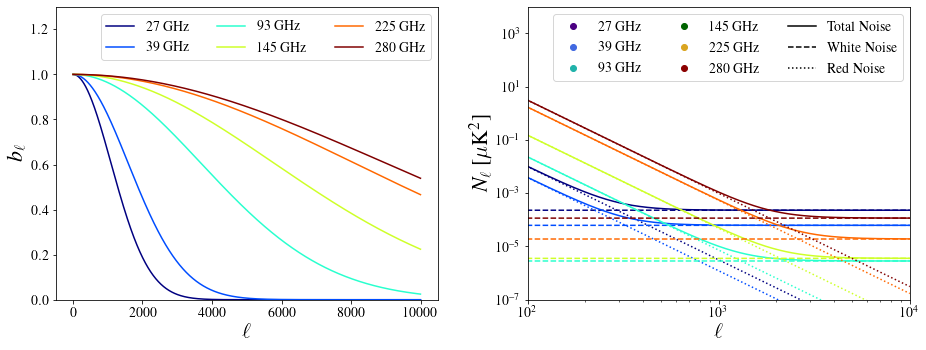

In [53]:
fig, axarr = plt.subplots(1,2, figsize=(13.5,5.5))
cmap = cm.jet
color_grad = [cmap(int(d)) for d in np.linspace(0, 255, len(freq_arr))]

for i in range(len(freq_arr)):
    axarr[0].plot(l, beam_arr[i],  color = color_grad[i], label = str(freq_arr[i])+' GHz')
axarr[0].set_xlabel(r'$\ell$', fontsize = sz_ft)
axarr[0].set_ylabel(r'$b_{\ell}$', fontsize = sz_ft)
axarr[0].set_ylim(0,1.3)
axarr[0].tick_params(labelsize = sz_lb)
axarr[0].legend(ncol = 3, prop={'size': sz_lb}) 

for i in range(len(freq_arr)):
    axarr[1].plot(l, noise_power_arr[i],  color = color_grad[i], ls = '-')
    axarr[1].plot(l, noise_power_white_arr[i],  color = color_grad[i], ls = '--')
    axarr[1].plot(l, noise_power_red_arr[i],  color = color_grad[i], ls = ':')

axarr[1].set_ylabel(r'$N_{\ell}\ [\mu$'+'K'+r'$^2]$', fontsize = sz_ft)
axarr[1].tick_params(labelsize = sz_lb)
axarr[1].set_xscale('log')
axarr[1].set_yscale('log')
axarr[1].set_xlim(100, 10000) 
axarr[1].set_ylim(1e-7, 1e4)
axarr[1].set_xlabel(r'$\ell$', fontsize = sz_ft)
patches = [Line2D([0], [0], color = c, marker='o', ls = '') for c in color_arr]
patches+= [Line2D([0], [0], color='black',linestyle='-')]
patches+= [Line2D([0], [0], color='black',linestyle='--')]
patches+= [Line2D([0], [0], color='black',linestyle=':')]
labels = [str(freq_arr[0])+' GHz', str(freq_arr[1])+' GHz', str(freq_arr[2])+' GHz', str(freq_arr[3])+' GHz',
          str(freq_arr[4])+' GHz', str(freq_arr[5])+' GHz','Total Noise', 'White Noise', 'Red Noise']
axarr[1].legend(patches, labels, ncol = 3, prop={'size': sz_lb})

fig.tight_layout(pad=3)
fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/beam_and_noise_so_lat.eps', dpi = 200, bbox_inches = 'tight')

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))

ax.set_yscale('log')
ax.plot(l, cl_residual_so-res_ilc_dic_so['ksz'], label = 'SO LAT', color = color_arr[0])
ax.plot(l, cl_residual_fyst-res_ilc_dic_fyst['ksz'], label = 'SO LAT + FYST', color = color_arr[1])
ax.plot(l, cl_residual_s4wide-res_ilc_dic_s4wide['ksz'], label = 'S4-Wide', color = color_arr[2])
ax.set_ylabel('ILC Residual Power', fontsize = sz_ft)
ax.set_xlabel(r'$\ell$', fontsize = sz_ft)
ax.tick_params(labelsize = sz_lb)
ax.set_xlim(100, 10000)
ax.set_ylim(1e-6, 1e-2)
ax.legend(prop={'size': sz_lb}) 

plt.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/residuals.eps', dpi = 200.)

In [ ]:
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(18,10))
(ax1, ax2, ax3) = axs



ax1.plot(l, weights_arr_so[0], label = str(freq_arr_so[0])+' GHz', color = 'violet')
ax1.plot(l, weights_arr_so[1], label = str(freq_arr_so[1])+' GHz', color = 'darkorange')
ax1.plot(l, weights_arr_so[2], label = str(freq_arr_so[2])+' GHz', color = 'blue')
ax1.plot(l, weights_arr_so[3], label = str(freq_arr_so[3])+' GHz', color = 'magenta')
ax1.plot(l, weights_arr_so[4], label = str(freq_arr_so[4])+' GHz', color = 'brown')
ax1.plot(l, weights_arr_so[5], label = str(freq_arr_so[5])+' GHz', color = 'deepskyblue')
tot = np.asarray(weights_arr_so[0])+np.asarray(weights_arr_so[1])+np.asarray(weights_arr_so[2])+np.asarray(weights_arr_so[3])+np.asarray(weights_arr_so[4])+np.asarray(weights_arr_so[5])
ax1.plot(l, tot, label = 'Sum', color = 'green', ls = '--')
ax1.set_xlim(115, 5000)
ax1.set_ylim(-1., 4.)
ax1.set_xlabel(r'$\ell$', fontsize = 15)
ax1.set_ylabel(r'$W_{\ell}$', fontsize = 15) 
ax1.set_yticks([-0.5, 0, 0.5, 1.5])
ax1.legend(ncol=4, loc = 'upper center')


ax2.plot(l, weights_arr_ccatp[0], label = str(int(round(freq_arr_ccatp[0],0)))+' GHz', color = 'violet')
ax2.plot(l, weights_arr_ccatp[1], label = str(int(round(freq_arr_ccatp[1],0)))+' GHz', color = 'darkorange')
ax2.plot(l, weights_arr_ccatp[2], label = str(int(round(freq_arr_ccatp[2],0)))+' GHz', color = 'blue')
ax2.plot(l, weights_arr_ccatp[3], label = str(int(round(freq_arr_ccatp[3],0)))+' GHz', color = 'magenta')
ax2.plot(l, weights_arr_ccatp[4], label = str(int(round(freq_arr_ccatp[4],0)))+' GHz', color = 'green')
ax2.plot(l, weights_arr_ccatp[5], label = str(int(round(freq_arr_ccatp[5],0)))+' GHz', color = 'purple')
ax2.plot(l, weights_arr_ccatp[6], label = str(int(round(freq_arr_ccatp[6],0)))+' GHz', color = 'deepskyblue')
ax2.plot(l, weights_arr_ccatp[7], label = str(int(round(freq_arr_ccatp[7],0)))+' GHz', color = 'lime')
ax2.plot(l, weights_arr_ccatp[8], label = str(int(round(freq_arr_ccatp[8],0)))+' GHz', color = 'midnightblue')
ax2.plot(l, weights_arr_ccatp[9], label = str(int(round(freq_arr_ccatp[9],0)))+' GHz', color = 'brown')
tot = np.asarray(weights_arr_ccatp[0])+np.asarray(weights_arr_ccatp[1])+np.asarray(weights_arr_ccatp[2])+np.asarray(weights_arr_ccatp[3])+np.asarray(weights_arr_ccatp[4])+np.asarray(weights_arr_ccatp[5])+np.asarray(weights_arr_ccatp[6])+np.asarray(weights_arr_ccatp[7])+np.asarray(weights_arr_ccatp[8])+np.asarray(weights_arr_ccatp[9])                                                                                                                                        
ax2.plot(l, tot, label = 'Sum', color = 'green', ls = '--')
ax2.set_xlim(115, 5000)
ax2.legend(ncol=4, loc = 'upper center')
ax2.set_xlabel(r'$\ell$', fontsize = 15)
leg = ax5.legend(ncol=4, loc = 'upper center')
txts = []
for text in leg.get_texts():
    txts.append(text)
tx = []
tx.append(txts[4])
tx.append(txts[7])
tx.append(txts[8])
tx.append(txts[9])
for j in tx:
    plt.setp(j, color = 'red')

ax3.plot(l, weights_arr_s4wide[0], label = str(freq_arr_s4wide[0])+' GHz', color = 'violet')
ax3.plot(l, weights_arr_s4wide[1], label = str(freq_arr_s4wide[1])+' GHz', color = 'darkorange')
ax3.plot(l, weights_arr_s4wide[2], label = str(freq_arr_s4wide[2])+' GHz', color = 'blue')
ax3.plot(l, weights_arr_s4wide[3], label = str(freq_arr_s4wide[3])+' GHz', color = 'magenta')
ax3.plot(l, weights_arr_s4wide[4], label = str(freq_arr_s4wide[4])+' GHz', color = 'green')
ax3.plot(l, weights_arr_s4wide[5], label = str(freq_arr_s4wide[5])+' GHz', color = 'purple')
tot = np.asarray(weights_arr_s4wide[0])+np.asarray(weights_arr_s4wide[1])+np.asarray(weights_arr_s4wide[2])+np.asarray(weights_arr_s4wide[3])+np.asarray(weights_arr_s4wide[4])+np.asarray(weights_arr_s4wide[5])                                                                                                                                        
ax3.plot(l, tot, label = 'Sum', color = 'green', ls = '--')
ax3.set_xlim(115, 5000)
ax3.set_xlabel(r'$\ell$', fontsize = 15)
ax3.legend(ncol=4, loc = 'upper center')



plt.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/weights.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
experiments = ['SO LAT', 'SO LAT + FYST', 'S4-Wide']
snr_arr = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/snr.npy') 
plt.plot(experiments, snr_arr, ls = '', marker = 'o')
plt.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/forecasts.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)